Bootstrap
- для сравнения двух групп, оценка есть ли статистически значимые различия между двумя группами;
- вычисление p-value и квантилей;
- визуализация данных, построение гистограммы

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm

In [31]:
def get_bootstrap2(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it = 1000,  # количество бутстрэп-подвыборок
    statistic = np.mean,  # интересующее нас значение
    bootstrap_conf_level = 0.95  # уровень значимости
):
    boot_data = np.empty(boot_it)  # Создаем пустой массив для бутстрэп-подвыборок
    len_data_1 = len(data_column_1)  # Вычисляем длину первой выборки
    
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(len_data_1, replace=True).values  # Создаем подвыборку 1
        samples_2 = data_column_2.sample(len_data_1, replace=True).values  # Создаем подвыборку 2
        boot_data[i] = statistic(samples_1) - statistic(samples_2)  # Вычисляем статистику для подвыборок и сохраняем разницу
    
    left_quant = (1 - bootstrap_conf_level) / 2  # Вычисляем левый квантиль
    right_quant = 1 - left_quant                 # Вычисляем правый квантиль
    quants = np.quantile(boot_data, [left_quant, right_quant])  # Вычисляем квантили бутстрэп-подвыборок
    
    boot_data_mean = np.mean(boot_data)  # Вычисляем среднее значение бутстрэп-подвыборок
    boot_data_std = np.std(boot_data)    # Вычисляем стандартное отклонение бутстрэп-подвыборок
    
    p_value = 2 * min(  # Вычисляем p-value для проверки гипотезы
        norm.cdf(0, loc=boot_data_mean, scale=boot_data_std),  # Вероятность получить значение меньше 0
        norm.cdf(0, loc=-boot_data_mean, scale=boot_data_std)  # Вероятность получить значение больше 0
    )
    
    # Визуализация, построим гистограмму бутстрэп-подвыборок
    plt.hist(boot_data, bins=50, color='grey', edgecolor='black')
    plt.axvline(quants[0], color='red', linestyle='--', label=f'Lower quantile ({left_quant:.2f}): {quants[0]:.4f}')  # Линия для левого квантиля
    plt.axvline(quants[1], color='red', linestyle='--', label=f'Upper quantile ({right_quant:.2f}): {quants[1]:.4f}')  # Линия для правого квантиля
    plt.title('Histogram of boot_data')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.show()
    
    return {
        'quants': quants,      # Возвращаем квантили
        'p_value': p_value,    # Возвращаем p-value
        'boot_data': boot_data # Возвращаем массив бутстрэп-подвыборок
    }

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7938.66it/s]


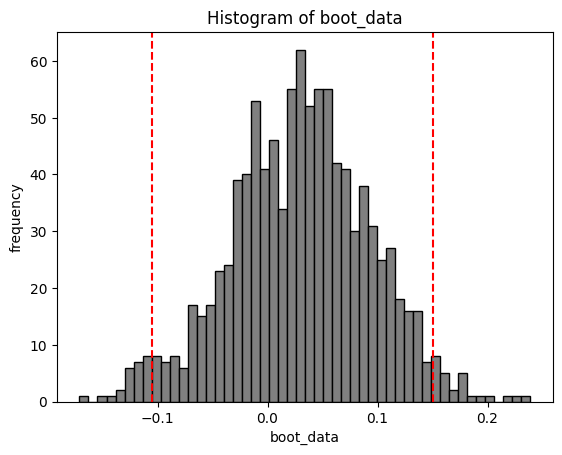

95% доверительный интервал: [-0.10546664  0.15060106]
p-value: 0.6357555655497522


In [32]:
# Пример использования 1
df1 = pd.DataFrame({'col1': np.random.randn(500), 'col2': np.random.randn(500)})
res1 = get_bootstrap2(df1.col1, df1.col2, boot_it = 1000, statistic = np.mean, bootstrap_conf_level = 0.95)

print(f"95% доверительный интервал: {res1['quants']}")
print(f"p-value: {res1['p_value']}")